# Plot von Schuckmannetal23 Energy Budget terms

# Notes

## imports

In [1]:
%%time
import datetime
import matplotlib.pyplot as plt
import nc_time_axis
import numpy as np
import os
#os.sys.path.insert(0, "/p/user_pub/xclim/persist/software/xsearch/")
#import pdb
import time
import xarray as xr
import xcdat as xc
#import xsearch as xs
from IPython.display import clear_output

CPU times: user 7.33 s, sys: 576 ms, total: 7.91 s
Wall time: 6.32 s


## define time

In [2]:
%%time
timeNow = datetime.datetime.now()
timeFormat = timeNow.strftime("%y%m%dT%H%M%S")
print("timeFormat:", timeFormat)

timeFormat: 250306T101046
CPU times: user 270 μs, sys: 0 ns, total: 270 μs
Wall time: 220 μs


## load von Schuckmannetal23 energy budget time history

In [3]:
%%time
dataPath = "~/p-work/Shared/obs_data/vonShuckmannetal23ESSD/" # LLNL machines
realms = {
    "ocean": "GCOS_EHI_1960-2020_Earth_Heat_Inventory_Ocean_Heat_Content_data.nc", # 19 total_, ocean: 0-300m, 0-700m, 0-2000m, 700-2000m, below_2000m
    "continental": "GCOS_EHI_1960-2020_Continental_Heat_Content_data.nc", # 2 continental_, ground_
    "cryosphere": "GCOS_EHI_1960-2020_Cryosphere_Heat_Content_data.nc", # 6 cryosphere_, arctic_sea_ice_, antarctic_sea_ice_, antarctic_ice_sheet_, glaciers_, greenland_
    "atmospheric": "GCOS_EHI_1960-2020_Atmosphere_Heat_Content_data.nc", # 1 atmospheric
    "permafrost": "GCOS_EHI_1960-2020_Permafrost_Heat_Content_data.nc", # 1 permafrost
    "inland_water": "GCOS_EHI_1960-2020_Inland_Water_Heat_Content_data.nc", # 1 inland_water_
}
for count, realm in enumerate(realms.keys()):
    print(count, realm)
    file = realms[realm]
    print("file:", file)
    fullPath = os.path.join(dataPath, file)
    print("fullPath:", fullPath)
    dsKey = "_".join(["ds", realm])
    vars()[dsKey] = xc.open_dataset(fullPath)
    print(eval(dsKey).keys())
    #clear_output(wait=True)

0 ocean
file: GCOS_EHI_1960-2020_Earth_Heat_Inventory_Ocean_Heat_Content_data.nc
fullPath: ~/p-work/Shared/obs_data/vonShuckmannetal23ESSD/GCOS_EHI_1960-2020_Earth_Heat_Inventory_Ocean_Heat_Content_data.nc
KeysView(<xarray.Dataset> Size: 5kB
Dimensions:                                     (time: 61)
Coordinates:
  * time                                        (time) object 488B 1960-06-30...
Data variables: (12/19)
    total_heat_content                          (time) float32 244B ...
    total_heat_content_uncertainty              (time) float32 244B ...
    atmospheric_heat_content                    (time) float32 244B ...
    atmospheric_heat_content_uncertainty        (time) float32 244B ...
    atmospheric_heat_content_coverage_factor    (time) float32 244B ...
    continental_heat_content                    (time) float32 244B ...
    ...                                          ...
    ocean_heat_content_0-2000m                  (time) float32 244B ...
    ocean_heat_content_0

In [ ]:
# interrogate example dataset
ds_ocean
# ds_ocean["ocean_heat_content_0-300m"][-1].data.item()

<xarray.Dataset> Size: 5kB
Dimensions:                                     (time: 61)
Coordinates:
  * time                                        (time) object 488B 1960-06-30...
Data variables: (12/19)
    total_heat_content                          (time) float32 244B ...
    total_heat_content_uncertainty              (time) float32 244B ...
    atmospheric_heat_content                    (time) float32 244B ...
    atmospheric_heat_content_uncertainty        (time) float32 244B ...
    atmospheric_heat_content_coverage_factor    (time) float32 244B ...
    continental_heat_content                    (time) float32 244B ...
    ...                                          ...
    ocean_heat_content_0-2000m                  (time) float32 244B ...
    ocean_heat_content_0-2000m_uncertainty      (time) float32 244B ...
    ocean_heat_content_700-2000m                (time) float32 244B ...
    ocean_heat_content_700-2000m_uncertainty    (time) float32 244B ...
    ocean_heat_content_below_2000m              (time) float32 244B ...
    ocean_heat_content_below_2000m_uncertainty  (time) float32 244B ...
Attributes:
    title:    Data of energy inventory
    paper:    Heat stored in the Earth system 1960-2020: Where does the energ...
    comment:  Period : 1960-2020.

## quick von Schuckmannetal23 plots

ocean_heat_content_0-300m 132.94

ocean_heat_content_300-700m 75.30
ocean_heat_content_0-700m 208.24
ocean_heat_content_700-2000m 109.33
ocean_heat_content_below_2000m 26.19
continental_heat_content 23.92
cryosphere_heat_content 13.19
atmospheric_heat_content 05.56
permafrost_heat_content 02.11
inland_water_heat_content 00.20


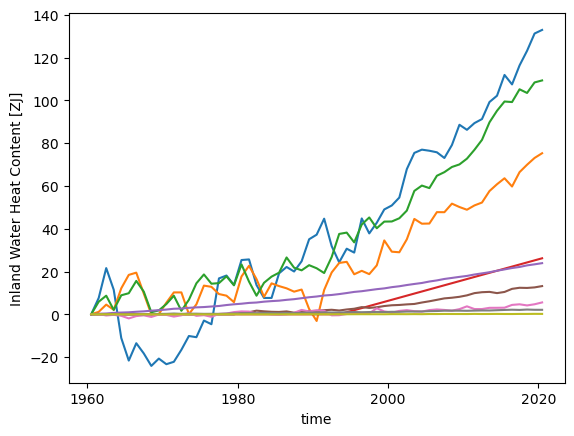

In [ ]:
ds_ocean["ocean_heat_content_0-300m"].plot()
print(
    "ocean_heat_content_0-300m",
    "{:05.2f}".format(ds_ocean["ocean_heat_content_0-300m"][-1].data.item()),
)
print()
# create 300-700 timeseries
ds3to700 = ds_ocean["ocean_heat_content_0-700m"] - ds_ocean["ocean_heat_content_0-300m"]
ds3to700.plot()
print("ocean_heat_content_300-700m", "{:05.2f}".format(ds3to700[-1].data.item()))
# ds_ocean["ocean_heat_content_0-700m"].plot()
print(
    "ocean_heat_content_0-700m",
    "{:05.2f}".format(ds_ocean["ocean_heat_content_0-700m"][-1].data.item()),
)
ds_ocean["ocean_heat_content_700-2000m"].plot()
print(
    "ocean_heat_content_700-2000m",
    "{:05.2f}".format(ds_ocean["ocean_heat_content_700-2000m"][-1].data.item()),
)
ds_ocean["ocean_heat_content_below_2000m"].plot()
print(
    "ocean_heat_content_below_2000m",
    "{:05.2f}".format(ds_ocean["ocean_heat_content_below_2000m"][-1].data.item()),
)
for realm in realms.keys():
    if realm == "ocean":
        continue
    else:
        varName = "_".join([realm, "heat_content"])
        vars()["ds"] = eval("_".join(["ds", realm]))
        ds[varName].plot()
        print(varName, "{:05.2f}".format(ds[varName][-1].data.item()))

## von Schuckmannetal23 plots

perc: [34.198425   19.371103   28.124607    6.7374525   6.152478    3.3941183
  1.4298744   0.5416087   0.05033057]
sum(perc): 99.99999837949872
['0-300m ocean: 34.2%', '300-700m ocean: 19.4%', '700-2000m ocean: 28.1%', '2000m+ ocean: 6.7%', 'continental: 6.2%', 'cryosphere: 3.4%', 'atmosphere: 1.4%', 'permafrost: 0.5%', 'inland water: 0.1%']


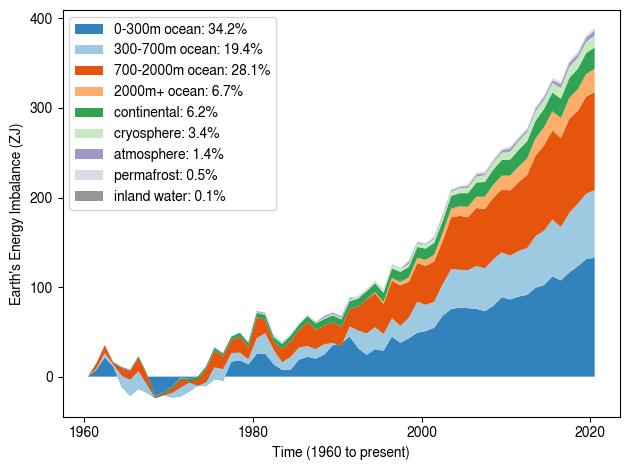

CPU times: user 155 ms, sys: 9.87 ms, total: 165 ms
Wall time: 165 ms


In [6]:
%%time
# plot up all components
ocean0to300 = ds_ocean["ocean_heat_content_0-300m"]
ocean300to700 = ds_ocean["ocean_heat_content_0-700m"]-ocean0to300
ocean700to2000 = ds_ocean["ocean_heat_content_700-2000m"]
ocean2000toBottom = ds_ocean["ocean_heat_content_below_2000m"]
continental = ds_continental["continental_heat_content"]
cryosphere = ds_cryosphere["cryosphere_heat_content"]
atmosphere = ds_atmospheric["atmospheric_heat_content"]
permafrost = ds_permafrost["permafrost_heat_content"]
inlandWater = ds_inland_water["inland_water_heat_content"]
ocean0to300.time.attrs["calendar"] = "standard"
x = ocean0to300.time.data # solves TypeError: 'int' object is not iterable
y = np.vstack([ocean0to300, ocean300to700, ocean700to2000, ocean2000toBottom, continental, cryosphere, atmosphere, permafrost, inlandWater])

# create % totals
y1 = np.sum(y[:, -1], axis=0)
perc = y[:, -1]
perc = (perc / y1) * 100
print("perc:", perc)
print("sum(perc):", sum(perc))

# create labels
f = "{:03.1f}%"
percLabels = []
strLabels = ["0-300m ocean", "300-700m ocean", "700-2000m ocean",
             "2000m+ ocean", "continental", "cryosphere",
             "atmosphere", "permafrost", "inland water"]
for count, lab in enumerate(strLabels):
    percLabels.append(': '.join([lab, f.format(perc[count])]))
print(percLabels)

# set up plot conditions
#fontName = "Microsoft Sans Serif"
fontName = "FreeSans"
#fontName = "PTSans" # macOS
#fontName = "Menlo" # macOS
# https://anaconda.org/conda-forge/mscorefonts/files
# https://stackoverflow.com/questions/42097053/matplotlib-cannot-find-basic-fonts
fontSize = 10
NUM_COLORS = 9
colList = []
cm = plt.get_cmap('tab20c')  # also tab 20b, tab20
# make ocean colours all blue - 26 leads to first 4 being blue dark-light
for i in range(NUM_COLORS):
    colList.append(cm(1.*i/NUM_COLORS))

# start plotting
labels = ["0-300m ocean", "300-700m ocean", "700-2000m ocean", "2000m+ ocean",
          "continental", "cryosphere", "atmosphere", "permafrost", "inland water"]
fig, ax = plt.subplots()
ax.stackplot(x, y, labels=percLabels, colors=colList)
#ax.legend(loc='upper left')
ax.legend(prop={"family": fontName, "size": fontSize}, loc="upper left")
plt.ylabel("Earth's Energy Imbalance (ZJ)", fontname=fontName, fontsize=fontSize)
plt.yticks(fontname=fontName, fontsize=fontSize)
plt.xlabel("Time (1960 to present)", fontname=fontName, fontsize=fontSize)
# below is not starting at 1960 on left
# https://stackoverflow.com/questions/29968654/format-of-datetime-in-pyplot-axis
#import matplotlib.dates as mdates; import matplotlib.ticker as plticker;
#loc = plticker.MultipleLocator(base=3652.5) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')); fig.autofmt_xdate()
plt.xticks(fontname=fontName, fontsize=fontSize)
# fill canvas
fig.tight_layout()
plt.show()

## Plot von Schuckmannetal23 controlling colours

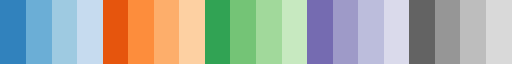

In [ ]:
cm1 = plt.get_cmap("tab20c")
cm1
# cm2 = plt.get_cmap('tab20b') # purple through green to pink
# cm2

y[:, -1] (ZJ): [132.93701    75.29985   109.326706   26.19       23.916073   13.193705
   5.558245    2.1053553   0.1956463]
sum(y[1:4, -1], -1): 209.816556930542
perc: [34.198425   19.371103   28.124607    6.7374525   6.152478    3.3941183
  1.4298744   0.5416087   0.05033057]
sum(perc): 99.99999837949872
['0-300m ocean: 34.2%', '300-700m ocean: 19.4%', '700-2000m ocean: 28.1%', '2000m+ ocean: 6.7%', 'continental: 6.2%', 'cryosphere: 3.4%', 'atmosphere: 1.4%', 'permafrost: 0.5%', 'inland water: 0.1%']


<timed exec>:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
<timed exec>:94: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


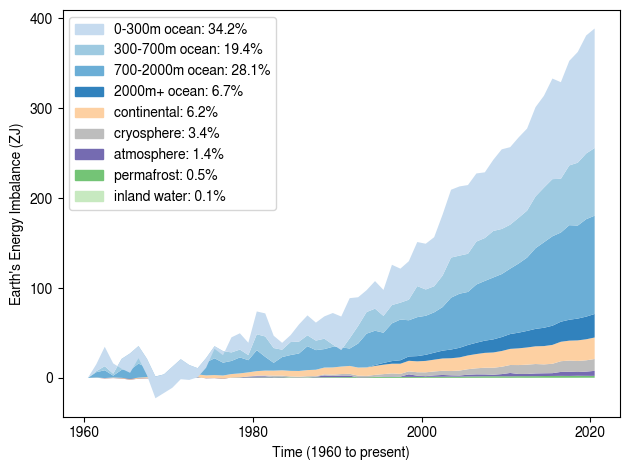

CPU times: user 138 ms, sys: 8.83 ms, total: 147 ms
Wall time: 146 ms


In [15]:
%%time
# plot up all components
ocean0to300 = ds_ocean["ocean_heat_content_0-300m"]
ocean300to700 = ds_ocean["ocean_heat_content_0-700m"]-ocean0to300
ocean700to2000 = ds_ocean["ocean_heat_content_700-2000m"]
ocean2000toBottom = ds_ocean["ocean_heat_content_below_2000m"]
continental = ds_continental["continental_heat_content"]
cryosphere = ds_cryosphere["cryosphere_heat_content"]
atmosphere = ds_atmospheric["atmospheric_heat_content"]
permafrost = ds_permafrost["permafrost_heat_content"]
inlandWater = ds_inland_water["inland_water_heat_content"]
ocean0to300.time.attrs["calendar"] = "standard"
x = ocean0to300.time.data # solves TypeError: 'int' object is not iterable
y = np.vstack([ocean0to300, ocean300to700, ocean700to2000, ocean2000toBottom, continental, cryosphere, atmosphere, permafrost, inlandWater])
yflip = np.flip(y, axis=0)

# create % totals
y1 = np.sum(y[:, -1], axis=0)
perc = y[:, -1]
perc = (perc / y1) * 100
print("y[:, -1] (ZJ):", y[:, -1])
print("sum(y[1:4, -1], -1):", sum(y[1:4, -1], -1))
print("perc:", perc)
print("sum(perc):", sum(perc))

# create labels
f = "{:03.1f}%"
percLabels = []
strLabels = ["0-300m ocean", "300-700m ocean", "700-2000m ocean",
             "2000m+ ocean", "continental", "cryosphere",
             "atmosphere", "permafrost", "inland water"]

# determine colours
# 4 ocean blues
# 1 continental green & brown
# 1 cryosphere dark grey
# 1 atmosphere light grey
colList = []
colList.append(cm1.colors[11]) # light green inland water: 0.1%
colList.append(cm1.colors[9])  # dark green permafrost: 0.5%
#colList.append(cm1.colors[18]) # light grey atmosphere: 1.4%
colList.append(cm1.colors[12]) # light grey atmosphere: 1.4%
#colList.append(cm1.colors[16]) # dark grey cryosphere: 3.4%
colList.append(cm1.colors[18]) # dark grey cryosphere: 3.4%
#colList.append(cm1.colors[8])  # darkest green 2000m+ continental: 6.2%
colList.append(cm1.colors[7])  # lightest orange 2000m+ continental: 6.2%
colList.append(cm1.colors[0])  # darkest blue 2000m+ ocean: 6.7%
colList.append(cm1.colors[1])  # dark blue 700-2000m ocean: 28.1%
colList.append(cm1.colors[2])  # light blue 300-700m ocean: 19.4%
colList.append(cm1.colors[3])  # lightest blue 0-300m ocean: 34.2%
colListFlip = []
colListFlip.append(cm1.colors[3])  # lightest blue 0-300m ocean: 34.2%
colListFlip.append(cm1.colors[2])  # light blue 300-700m ocean: 19.4%
colListFlip.append(cm1.colors[1])  # dark blue 700-2000m ocean: 28.1%
colListFlip.append(cm1.colors[0])  # darkest blue 2000m+ ocean: 6.7%
#colListFlip.append(cm1.colors[8])  # darkest green 2000m+ continental: 6.2%
colListFlip.append(cm1.colors[7])  # lightest orange 2000m+ continental: 6.2%
#colListFlip.append(cm1.colors[16]) # dark grey cryosphere: 3.4%
colListFlip.append(cm1.colors[18]) # dark grey cryosphere: 3.4%
#colListFlip.append(cm1.colors[18]) # light grey atmosphere: 1.4%
colListFlip.append(cm1.colors[12]) # light grey atmosphere: 1.4%
colListFlip.append(cm1.colors[9])  # dark green permafrost: 0.5%
colListFlip.append(cm1.colors[11]) # light green inland water: 0.1%

for count, lab in enumerate(strLabels):
    percLabels.append(': '.join([lab, f.format(perc[count])]))
print(percLabels)

# set up plot conditions
#fontName = "Microsoft Sans Serif"
fontName = "FreeSans"
#fontName = "PTSans" # macOS
#fontName = "Menlo" # macOS
# https://anaconda.org/conda-forge/mscorefonts/files
# https://stackoverflow.com/questions/42097053/matplotlib-cannot-find-basic-fonts
fontSize = 10

# start plotting
labels = ["0-300m ocean", "300-700m ocean", "700-2000m ocean", "2000m+ ocean",
          "continental", "cryosphere", "atmosphere", "permafrost", "inland water"]
fig, ax = plt.subplots()
ax.stackplot(x, yflip, labels=percLabels, colors=colList)
leg = ax.legend(loc="upper left", prop={"family": fontName, "size": fontSize})
# reassign colours to legend
# https://stackoverflow.com/questions/23698850/manually-set-color-of-points-in-legend
for handle in np.arange(0,9):
    leg.legend_handles[handle].set_facecolor(colListFlip[handle])
    leg.legend_handles[handle].set_edgecolor(colListFlip[handle])

plt.ylabel("Earth's Energy Imbalance (ZJ)", fontname=fontName, fontsize=fontSize)
ax.yaxis.label.set(fontname=fontName, fontsize=fontSize)
ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), fontname=fontName, fontsize=fontSize)
plt.xlabel("Time (1960 to present)", fontname=fontName, fontsize=fontSize)
ax.xaxis.label.set(fontname=fontName, fontsize=fontSize)
ax.xaxis.set_ticklabels(ax.xaxis.get_ticklabels(), fontname=fontName, fontsize=fontSize)
# below is not starting at 1960 on left
# https://stackoverflow.com/questions/29968654/format-of-datetime-in-pyplot-axis
#import matplotlib.dates as mdates; import matplotlib.ticker as plticker;
#loc = plticker.MultipleLocator(base=3652.5) # this locator puts ticks at regular intervals
#ax.xaxis.set_major_locator(loc)
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y')); fig.autofmt_xdate()
# fill canvas
fig.tight_layout()
plt.show()
# write to file
#fig.savefig("_".join([timeFormat, "vonSchuckmann23ESSD-EEI-1960-2020.png"]), dpi=300)

### query available fonts

In [9]:
%%time
# query available fonts
#from matplotlib import font_manager as fm
#fns = fm.findSystemFonts(fontpaths=None, fontext='ttf'); fns.sort()
#for count, fn in enumerate(fns):
#    if "/" in fn:
#        print(fn)

CPU times: user 3 μs, sys: 0 ns, total: 3 μs
Wall time: 6.44 μs


## plot volcanic forcings over time - forcing uncertainty is large

In [ ]:
# Volcanic datasets
# CMIP3: Ammann 2003 https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=noaa-forcing-5786 - done
# CMIP3: Sato 1993 1850-2012 https://data.giss.nasa.gov/modelforce/strataer/ - done
# CMIP5: Sato + Stenchikov 1998 (GFDL) - folded into update above?
# CMIP5: Gao et al 2008 https://doi.org/10.1029/2008JD010239 http://climate.envsci.rutgers.edu/IVI2/ - done
# CMIP6: Neely & Schmidt 2016 VolcanEESM https://catalogue.ceda.ac.uk/uuid/fab717b3cf06461490b186fe5242c45d - done
# CMIP6: Luo et al 2017 http://doi.org/10.22033/ESGF/input4MIPs.1681
# https://volcano.si.edu

# See what we have
# forcePath = "/p/user_pub/climate_work/durack1/Shared/240209_CMIP6Plus_forcing"
# inFile = "Neely2016-VolcanicForcing/v20240209/volcan-eesm_global_2015_so2-emissions-database_v1.0.nc"
# inPath = os.path.join(forcePath, inFile)
# ds = xc.open_dataset(inPath)
# ds